In [1]:
import sys
import os
import numpy as np
import pandas as pd

import missingno as msno
import matplotlib.pyplot as plt


sys.path.append('../')
from Utils.Combine_datasets import combine_mvas_adni
from Utils.util_functions import get_events

In [4]:
df, a, b = combine_mvas_adni(verbose=False)
print(df.shape)
print(a.shape)
print(b.shape)
print(a[['DX', 'M', 'COLPROT_MVAS']])

c:\Users\dbior\OneDrive - Aarhus Universitet\Dokumenter\1. Uni\10. Semester\Master-project\Code\Cluster\EDA\..\Utils\Get_adni.py:93: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datapath)
2024-06-01 23:01:52.022 | INFO     | Utils.Get_adni:get_merge:145 - Missing value feature cutoff: 99.0 %
2024-06-01 23:01:52.025 | INFO     | Utils.Get_adni:get_merge:146 - Removing columns with cutoff: Index(['PIB', 'ABETA', 'TAU', 'PTAU', 'DIGITSCOR', 'FLDSTRENG'], dtype='object')
2024-06-01 23:01:52.032 | INFO     | Utils.Get_adni:get_merge:166 - Categorical columns: Index(['COLPROT', 'ORIGPROT', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'FSVERSION'], dtype='object')
2024-06-01 23:01:52.046 | INFO     | Utils.Get_adni:get_merge:180 - Data shape = (3614, 56)


Subjects with DX=1: (38,)
(291, 107)
(38, 106)
(113, 106)
      DX     M  COLPROT_MVAS
1    1.0  24.0          True
9    1.0  24.0          True
16   2.0  24.0          True
18   2.0  24.0          True
23   1.0  24.0          True
25   2.0  24.0          True
28   2.0  24.0          True
30   1.0  24.0          True
39   1.0  24.0          True
41   2.0  24.0          True
45   1.0  24.0          True
47   1.0  24.0          True
49   1.0  24.0          True
51   2.0  24.0          True
53   1.0  24.0          True
57   2.0  24.0          True
60   2.0  24.0          True
64   1.0  24.0          True
66   2.0  24.0          True
68   2.0  24.0          True
73   1.0  24.0          True
75   1.0  24.0          True
77   1.0  24.0          True
79   1.0  24.0          True
83   1.0  24.0          True
90   2.0  24.0          True
92   1.0  24.0          True
94   1.0  24.0          True
96   1.0  24.0          True
98   1.0  24.0          True
100  1.0  24.0          True
102  1.0  24.0

In [13]:
df['COLPROT_MVAS'].value_counts()

COLPROT_MVAS
False    253
True      38
Name: count, dtype: int64

In [6]:
from matplotlib.font_manager import FontProperties

font_path = '../Old_Standard_TT'
font_path_regular = f'{font_path}/OldStandardTT-Regular.ttf'
font_path_bold = f'{font_path}/OldStandardTT-Bold.ttf'
font_path_italic = f'{font_path}/OldStandardTT-Italic.ttf'

prop_regular = FontProperties(fname=font_path_regular)
prop_bold = FontProperties(fname=font_path_bold)
prop_italic = FontProperties(fname=font_path_italic)

# font_path_regular = '/home/diego/.conda/envs/diego/fonts/OldStandardTT-Regular.ttf'
# font_path_bold = '/home/diego/.conda/envs/diego/fonts/OldStandardTT-Bold.ttf'
# font_path_italic = '/home/diego/.conda/envs/diego/fonts/OldStandardTT-Italic.ttf'
# # Create a FontProperties object with the full path to the font file
# prop_regular = FontProperties(fname=font_path_regular)
# prop_bold = FontProperties(fname=font_path_bold)
# prop_italic = FontProperties(fname=font_path_italic)

my_colors = ['#B0DAFF', '#FFB085']

In [3]:
merge, extra = combine_mvas_adni()
print(merge.shape, extra.shape)

c:\Users\dbior\OneDrive - Aarhus Universitet\Dokumenter\1. Uni\10. Semester\Master-project\Code\Cluster\EDA\..\Utils\Get_adni.py:48: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datapath)
2024-06-01 02:39:52.115 | INFO     | Utils.Get_adni:get_merge:100 - Missing value feature cutoff: 99.0 %
2024-06-01 02:39:52.115 | INFO     | Utils.Get_adni:get_merge:101 - Removing columns with cutoff: Index(['PIB', 'ABETA', 'TAU', 'PTAU', 'DIGITSCOR', 'FLDSTRENG'], dtype='object')
2024-06-01 02:39:52.125 | INFO     | Utils.Get_adni:get_merge:121 - Categorical columns: Index(['COLPROT', 'ORIGPROT', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'FSVERSION'], dtype='object')
2024-06-01 02:39:52.136 | INFO     | Utils.Get_adni:get_merge:135 - Data shape = (3614, 56)


Index(['PiB_SUVR_caudate', 'SEPWI_CBF_caudate', 'SEPWI_CBV_caudate',
       'SEPWI_CMRO2_caudate', 'SEPWI_CTH_caudate', 'SEPWI_OEF_caudate',
       'Volume_mm3_caudate', 'PiB_SUVR_frontal_gm', 'SEPWI_CBF_frontal_gm',
       'SEPWI_CBV_frontal_gm',
       ...
       'REMOVE', 'ADAS11', 'ADAS13', 'ADASQ4', 'RAVLT_immediate', 'LDELTOTAL',
       'FAQ', 'COLPROT_1', 'COLPROT_MVAS', 'COLPROT_MVAS_APOE4'],
      dtype='object', length=106)
(291, 107) (75, 106)


(876, 105)


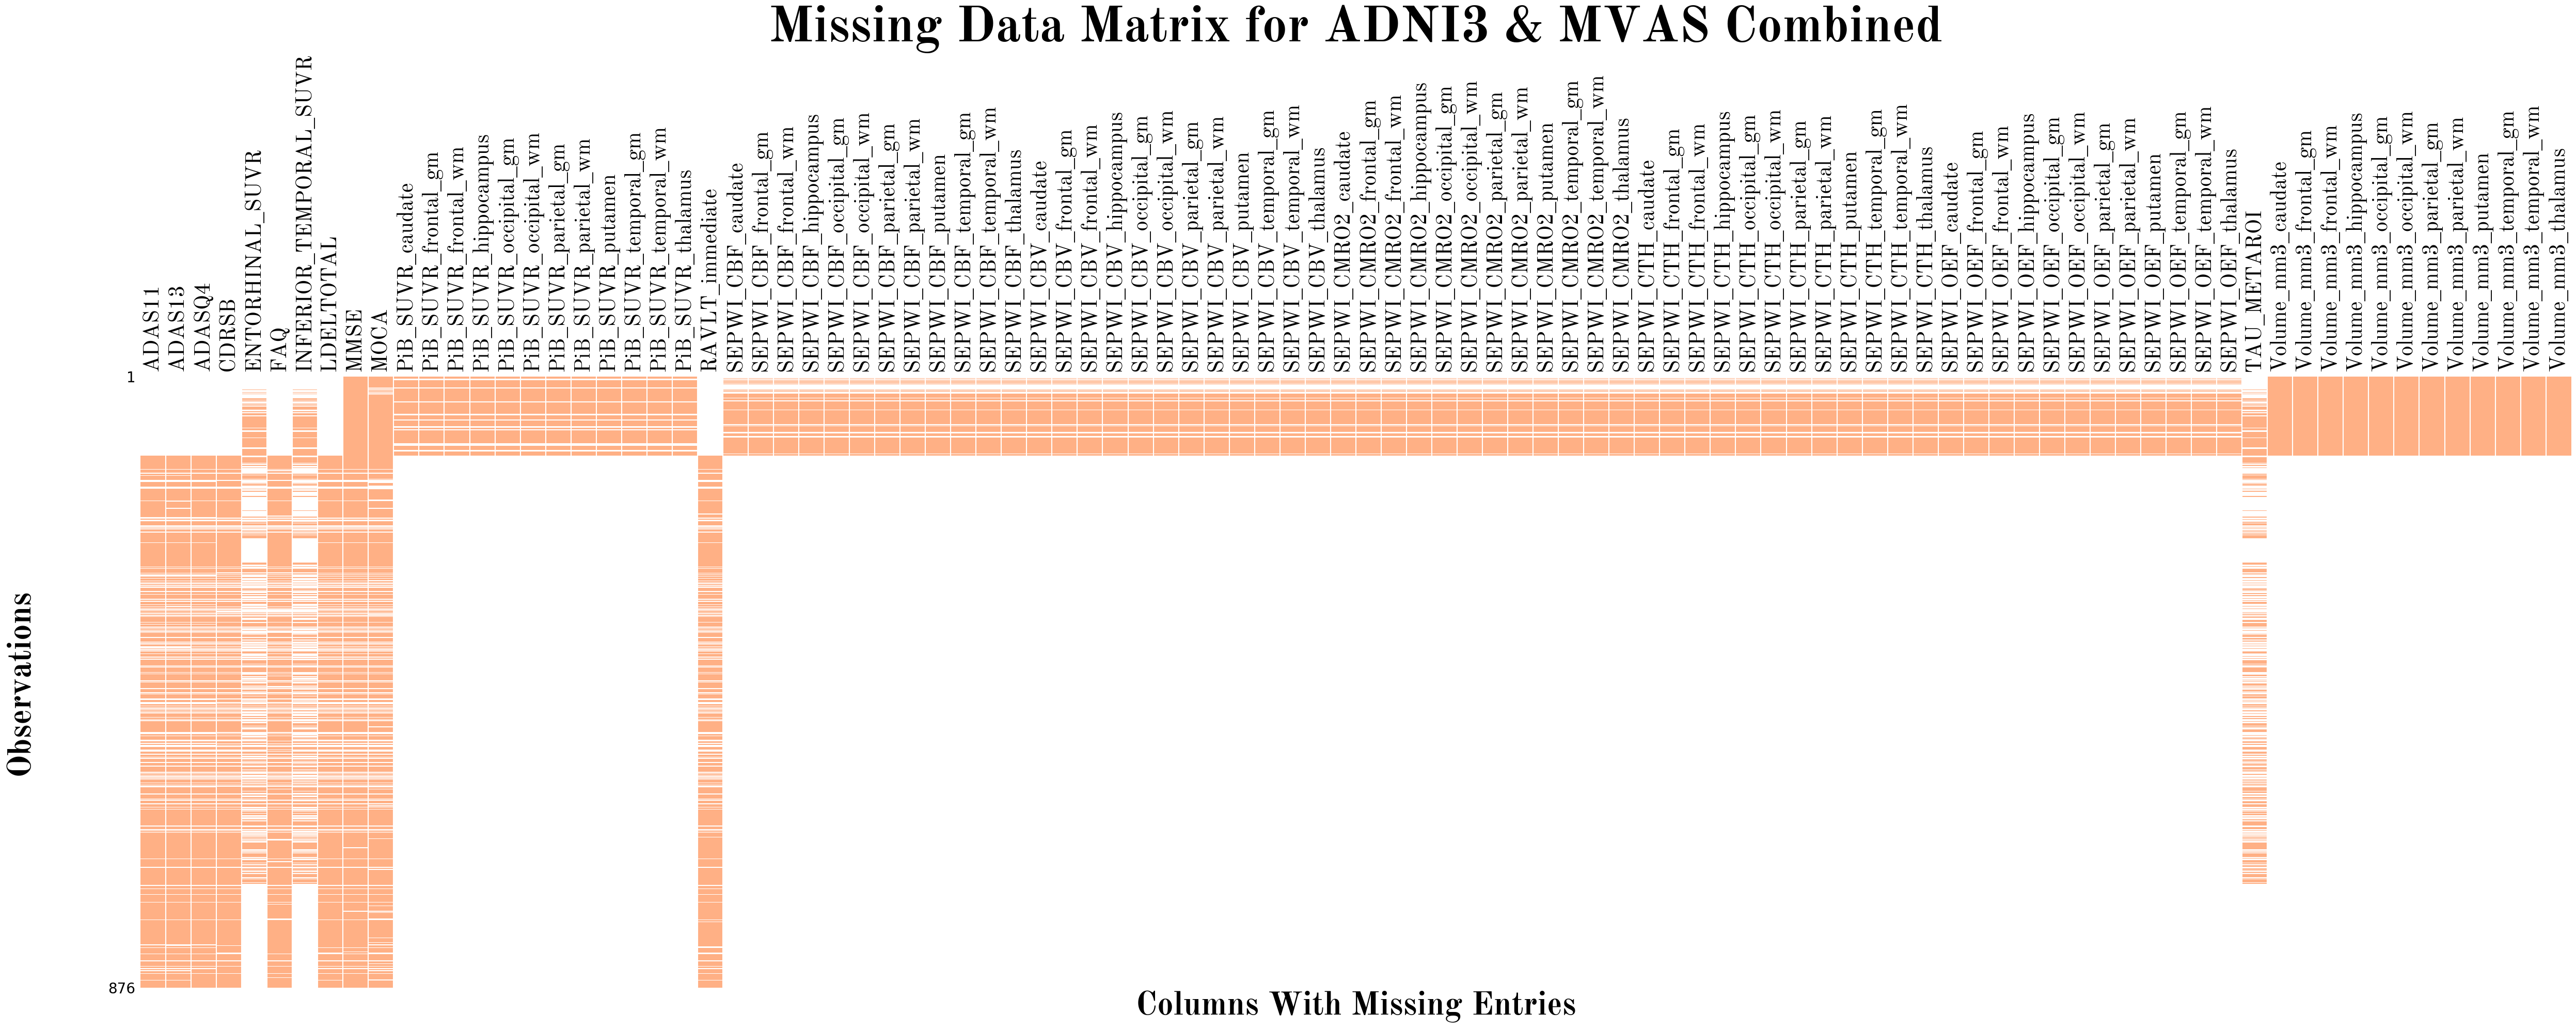

In [4]:
def hex_to_rbg(hex_color):
    h = hex_color.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

print(merge.shape)
columns = merge.columns[merge.isnull().mean() < 0.1]

merge_na = merge.drop(columns, axis=1)
#Sort merge_na columns alphabetically
merge_na = merge_na.reindex(sorted(merge_na.columns), axis=1)

msno.matrix(merge_na, sparkline=False, color=hex_to_rbg(my_colors[1]), labels=True, figsize=(50, 20))
plt.title('Missing Data Matrix for ADNI3 & MVAS Combined', fontproperties=prop_bold, fontsize=70)
plt.xlabel('Columns With Missing Entries', fontproperties=prop_bold, fontsize=45)
plt.ylabel('Observations', fontproperties=prop_bold, fontsize=45, labelpad=100)
plt.xticks(rotation=90, fontproperties=prop_regular, fontsize=30, horizontalalignment='center')
plt.yticks([], minor=True)

plt.tight_layout()
plt.savefig("figures/missing_data_matrix_combined.png")
plt.show()


c:\Users\dbior\OneDrive - Aarhus Universitet\Dokumenter\1. Uni\10. Semester\Master-project\Code\Cluster\EDA\..\Utils\Get_adni.py:93: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datapath)
2024-06-02 01:30:59.186 | INFO     | Utils.Get_adni:get_merge:145 - Missing value feature cutoff: 99.0 %
2024-06-02 01:30:59.190 | INFO     | Utils.Get_adni:get_merge:146 - Removing columns with cutoff: Index(['PIB', 'ABETA', 'TAU', 'PTAU', 'DIGITSCOR', 'FLDSTRENG'], dtype='object')
2024-06-02 01:30:59.201 | INFO     | Utils.Get_adni:get_merge:166 - Categorical columns: Index(['COLPROT', 'ORIGPROT', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'FSVERSION'], dtype='object')
2024-06-02 01:30:59.228 | INFO     | Utils.Get_adni:get_merge:180 - Data shape = (3614, 56)


Subjects with DX=1: (38,)
(38, 106)
(442, 107)


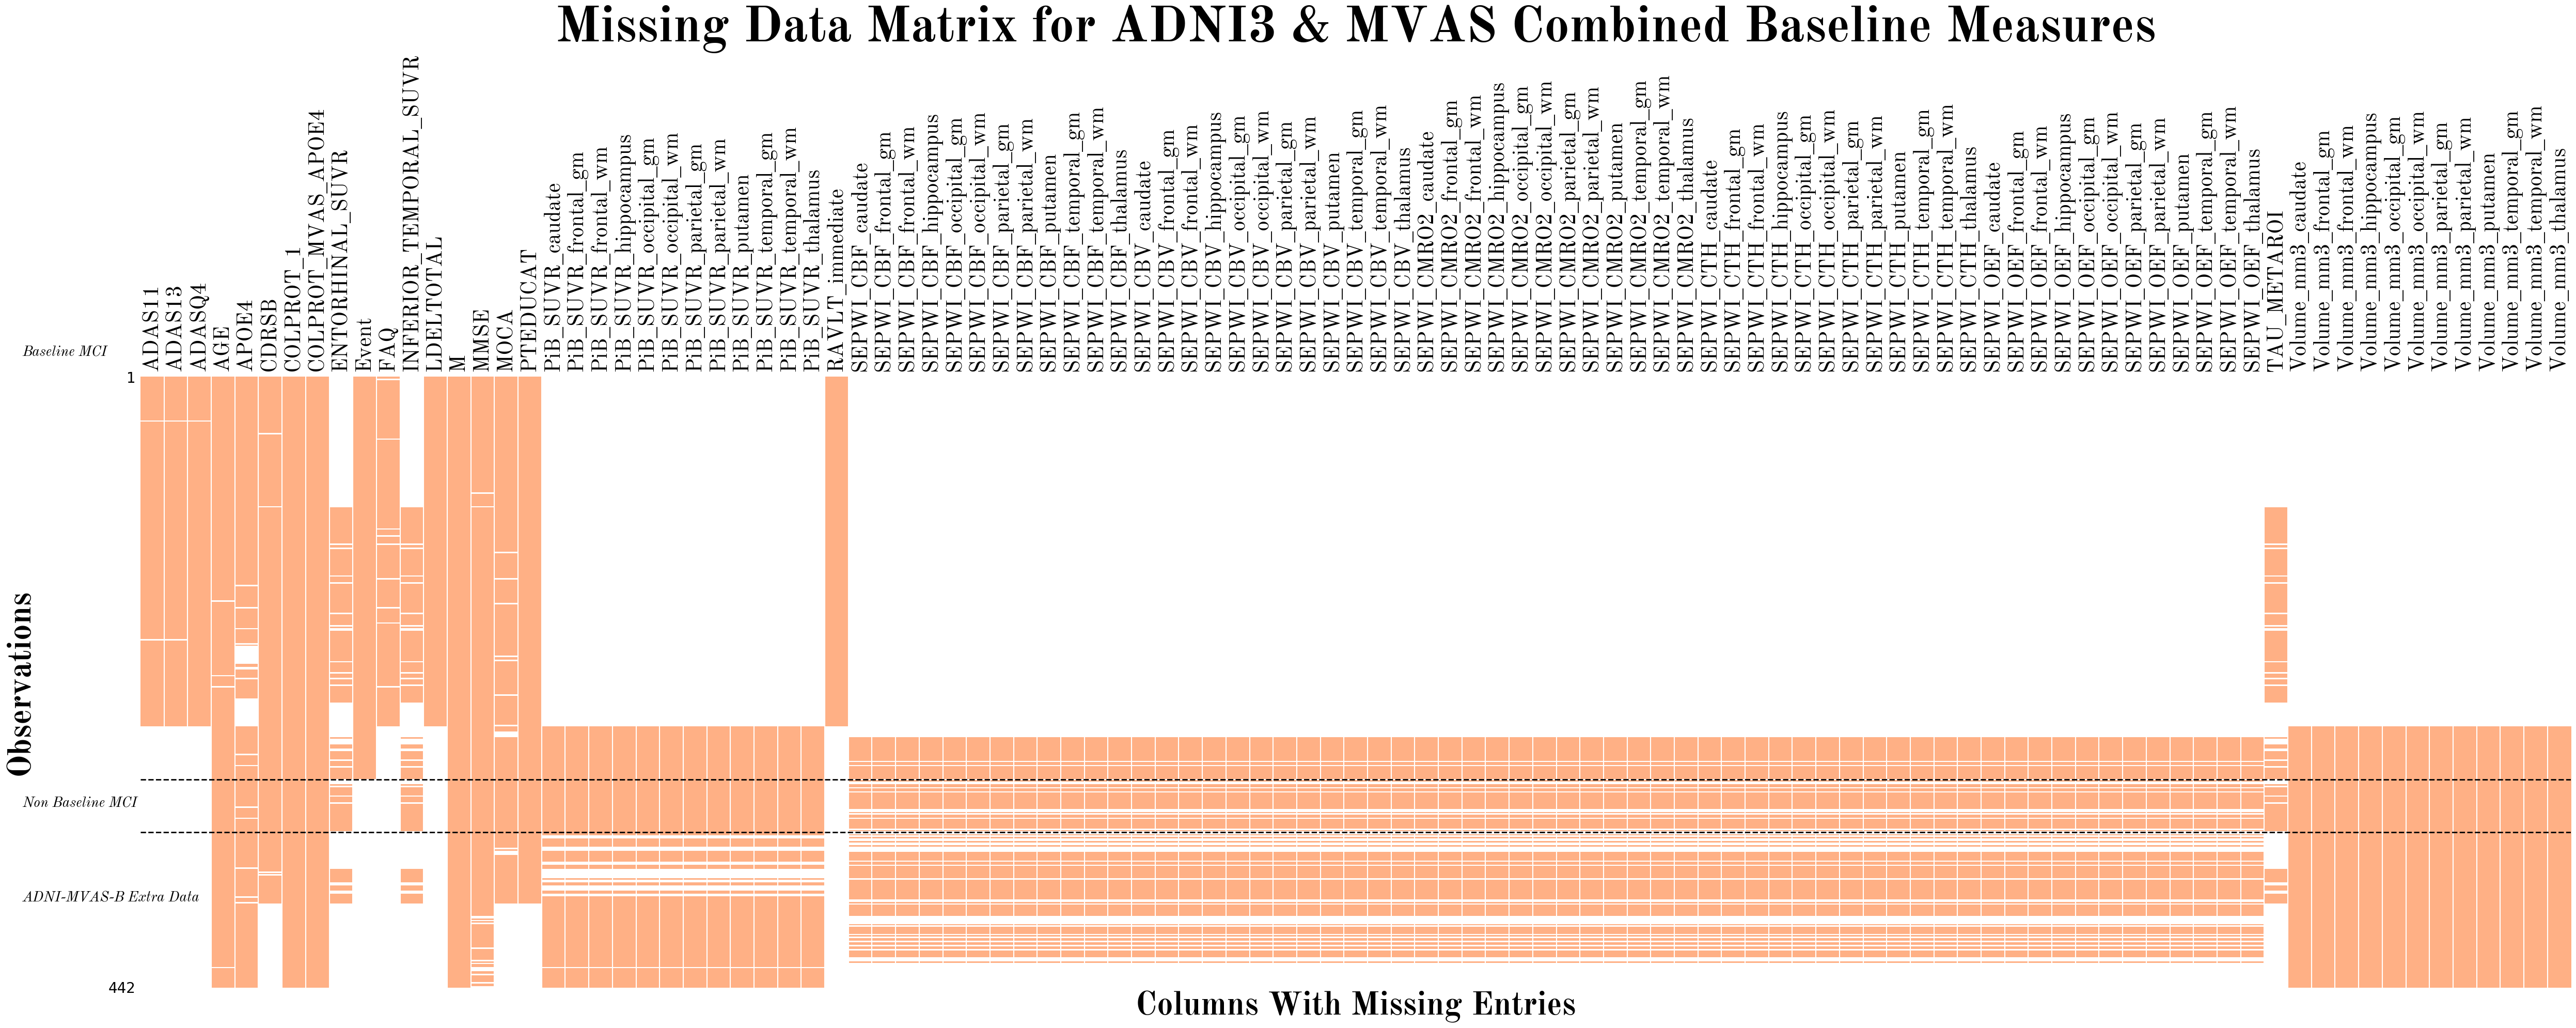

In [18]:
import missingno as msno
import matplotlib.pyplot as plt
pure, extra_mci, extra = combine_mvas_adni(verbose=False)
print(extra_mci.shape)
def hex_to_rbg(hex_color):
    h = hex_color.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))


merge = pd.concat([pure, extra_mci, extra], ignore_index=True)
print(merge.shape)
columns = merge.columns[merge.isnull().mean() < 0.1]


merge.drop(['RID', 'REMOVE', 'COLPROT_MVAS', 'DX'], axis=1, inplace=True)
merge = merge.reindex(sorted(merge.columns), axis=1)

msno.matrix(merge, sparkline=False, color=hex_to_rbg(my_colors[1]), labels=True, figsize=(50, 20))
plt.title('Missing Data Matrix for ADNI3 & MVAS Combined Baseline Measures', fontproperties=prop_bold, fontsize=70)
plt.xlabel('Columns With Missing Entries', fontproperties=prop_bold, fontsize=45)
plt.ylabel('Observations', fontproperties=prop_bold, fontsize=45, labelpad=100)
plt.xticks(rotation=90, fontproperties=prop_regular, fontsize=30, horizontalalignment='center')
plt.yticks([], minor=True)

plt.text(x=-5.5, y=pure.shape[0]//-20, s='Baseline MCI', fontproperties=prop_italic, fontsize=20, color='black')
plt.axhline(y=pure.shape[0], color='black', linestyle='--', linewidth=2)  # Draw a line at the change of cohorts
plt.text(x=-5.5, y=pure.shape[0]+20, s='Non Baseline MCI', fontproperties=prop_italic, fontsize=20, color='black')
plt.axhline(y=pure.shape[0]+extra_mci.shape[0], color='black', linestyle='--', linewidth=2)  # Draw a line at the change of cohorts
plt.text(x=-5.5, y=pure.shape[0]+extra_mci.shape[0]+50, s='ADNI-MVAS-B Extra Data', fontproperties=prop_italic, fontsize=20, color='black')


plt.tight_layout()
plt.savefig("figures/missing_data_matrix_combined.png")
plt.show()


In [7]:
missingness = merge.reindex(sorted(merge.columns), axis=1).isna().mean() * 100

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
print(missingness)
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)
pd.reset_option('display.max_colwidth', None)

ADAS11                      21.886792
ADAS13                      22.264151
ADASQ4                      21.509434
AGE                          0.377358
APOE4                        8.301887
CDRSB                       21.509434
COLPROT_MVAS                 0.000000
DX                           0.000000
ENTORHINAL_SUVR             20.377358
FAQ                         22.641509
INFERIOR_TEMPORAL_SUVR      20.377358
LDELTOTAL                   21.509434
M                            0.000000
MMSE                         0.000000
MOCA                         4.905660
PTEDUCAT                     0.000000
PTGENDER_Male                0.000000
PiB_SUVR_caudate            82.264151
PiB_SUVR_frontal_gm         82.264151
PiB_SUVR_frontal_wm         82.264151
PiB_SUVR_hippocampus        82.264151
PiB_SUVR_occipital_gm       82.264151
PiB_SUVR_occipital_wm       82.264151
PiB_SUVR_parietal_gm        82.264151
PiB_SUVR_parietal_wm        82.264151
PiB_SUVR_putamen            82.264151
PiB_SUVR_tem

In [22]:
#Adni3
from Utils.Get_adni import get_adni3
from Utils.util_functions import get_events
adni3 = get_adni3()
adni3_sa = get_events(adni3)
print(adni3_sa.shape)
print(adni3_sa.columns)

c:\Users\dbior\OneDrive - Aarhus Universitet\Dokumenter\1. Uni\10. Semester\Master-project\Code\Cluster\EDA\..\Utils\Get_adni.py:93: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datapath)
2024-06-01 17:11:31.279 | INFO     | Utils.Get_adni:get_merge:145 - Missing value feature cutoff: 99.0 %
2024-06-01 17:11:31.282 | INFO     | Utils.Get_adni:get_merge:146 - Removing columns with cutoff: Index(['PIB', 'ABETA', 'TAU', 'PTAU', 'DIGITSCOR', 'FLDSTRENG'], dtype='object')
2024-06-01 17:11:31.288 | INFO     | Utils.Get_adni:get_merge:166 - Categorical columns: Index(['COLPROT', 'ORIGPROT', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'FSVERSION'], dtype='object')
2024-06-01 17:11:31.302 | INFO     | Utils.Get_adni:get_merge:180 - Data shape = (3614, 56)


(234, 61)
Index(['RID', 'SITE', 'VISCODE', 'AGE', 'PTEDUCAT', 'APOE4', 'FDG', 'AV45',
       'FBB', 'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE', 'RAVLT_immediate',
       'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting',
       'LDELTOTAL', 'TRABSCOR', 'FAQ', 'MOCA', 'EcogPtMem', 'EcogPtLang',
       'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt',
       'EcogPtTotal', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan',
       'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'Ventricles',
       'Hippocampus', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'DX',
       'mPACCdigit', 'mPACCtrailsB', 'M', 'PTMARRY_Never_married',
       'PTMARRY_married', 'ORIGPROT_ADNI2', 'ORIGPROT_ADNI3',
       'ORIGPROT_ADNIGO', 'PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino',
       'PTETHCAT_Unknown', 'PTRACCAT_Other', 'PTRACCAT_White',
       'ENTORHINAL_SUVR', 'INFERIOR_TEMPORAL_SUVR', 'TAU_METAROI', 'REMOVE',
       'Event'],
      dtype='object')


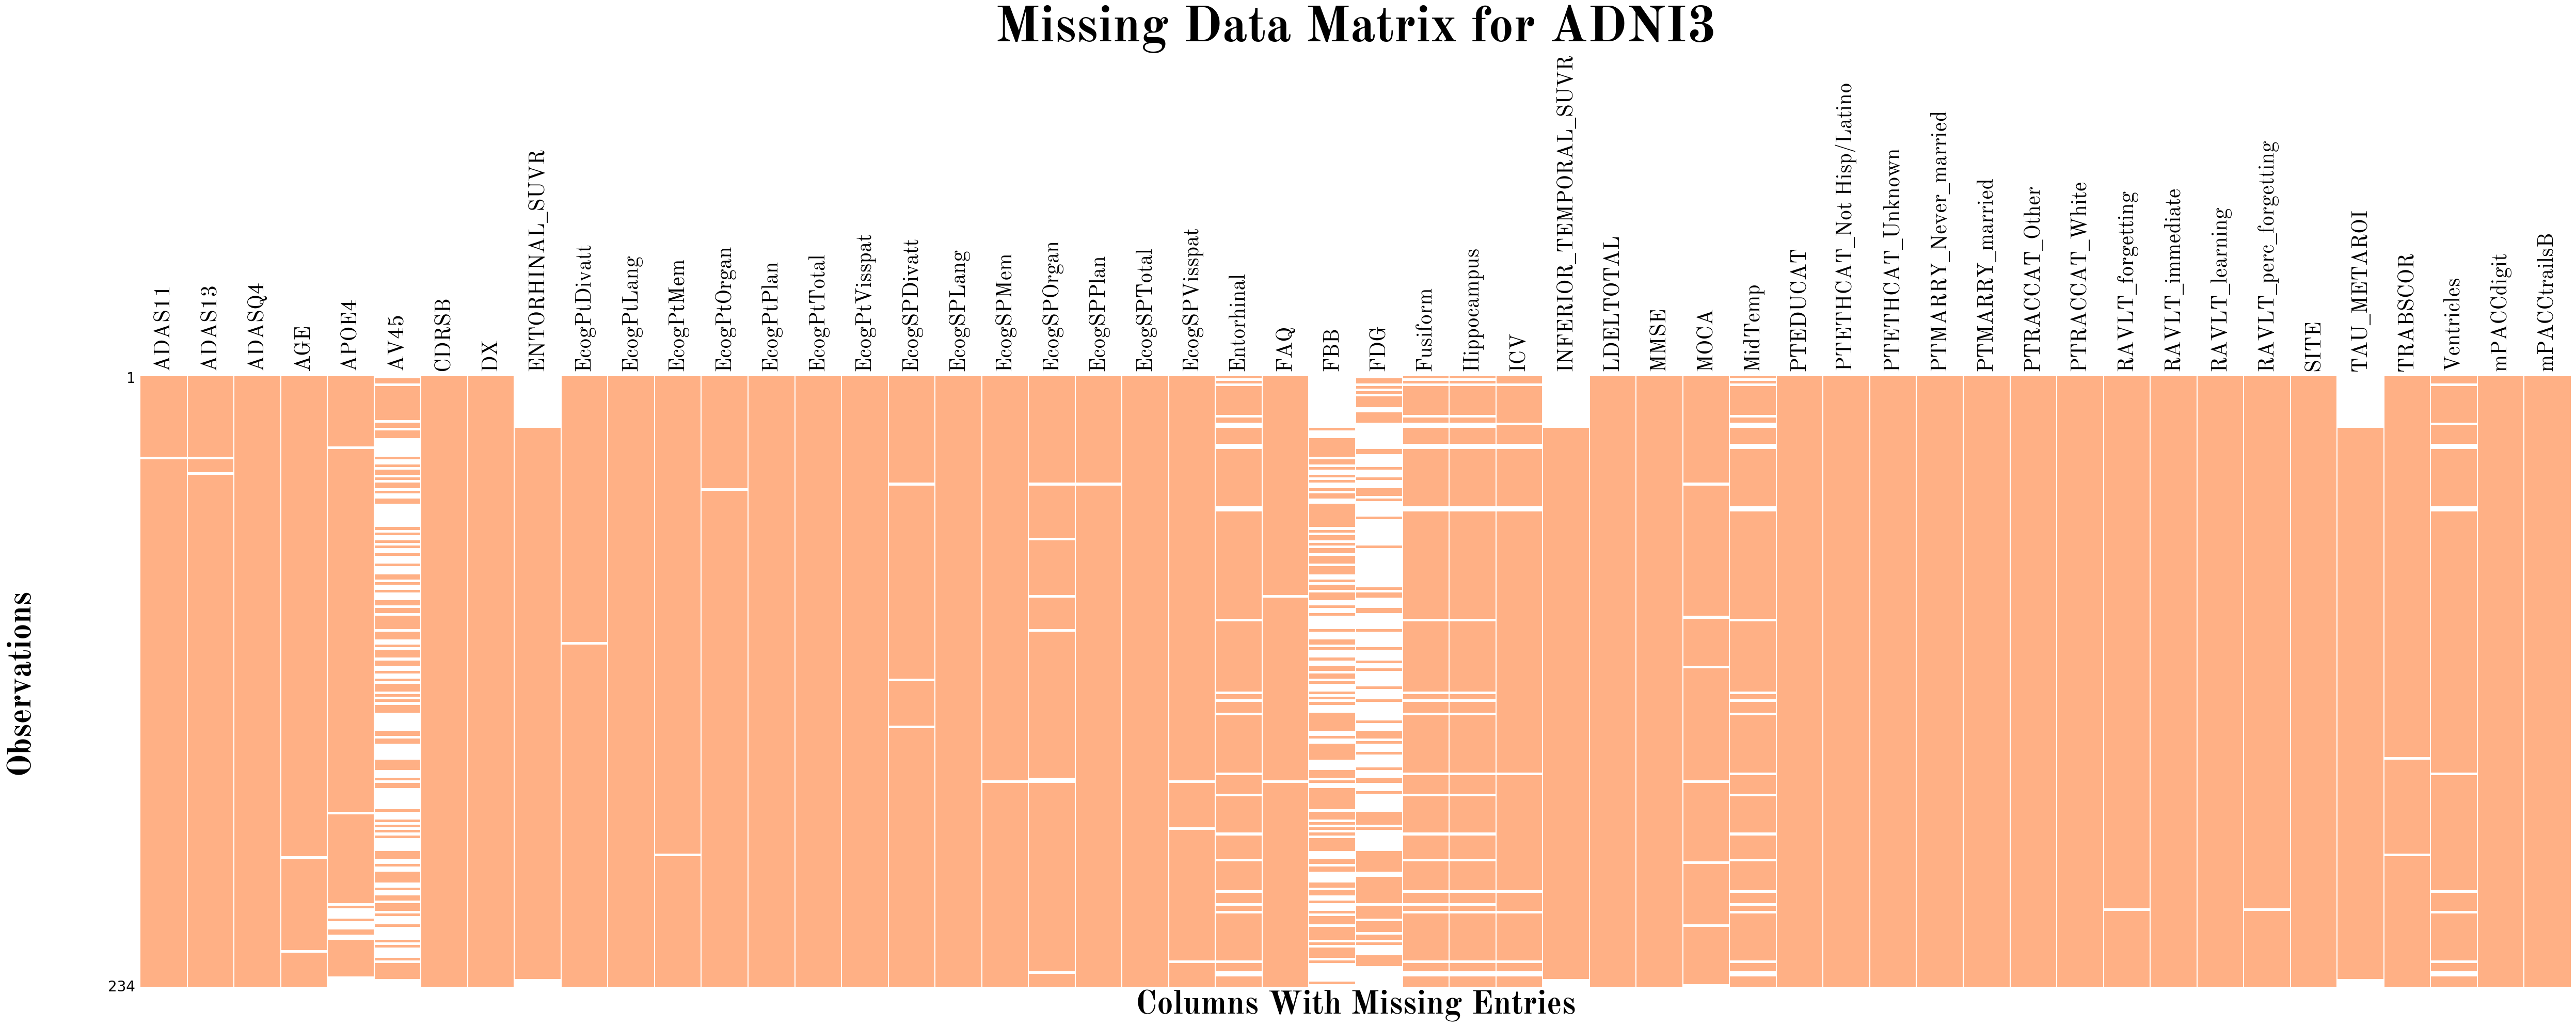

In [23]:
def hex_to_rbg(hex_color):
    h = hex_color.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

# columns = adni3_sa.columns[adni3_sa.isnull().mean() < 0.01]
# adni3_sa_na = adni3_sa.drop(columns, axis=1)
rm = ['RID', 'Event', 'M', 'VISCODE', 'REMOVE', 
      'ORIGPROT_ADNI2', 'ORIGPROT_ADNI3',
      'ORIGPROT_ADNIGO', 'PTGENDER_Male']
adni3_sa = adni3_sa.drop(rm, axis=1)
adni3_sa = adni3_sa.reindex(sorted(adni3_sa.columns), axis=1)


msno.matrix(adni3_sa, sparkline=False, color=hex_to_rbg(my_colors[1]), labels=True, figsize=(50, 20))
plt.title('Missing Data Matrix for ADNI3', fontproperties=prop_bold, fontsize=70)
plt.xlabel('Columns With Missing Entries', fontproperties=prop_bold, fontsize=45)
plt.ylabel('Observations', fontproperties=prop_bold, fontsize=45, labelpad=100)
plt.xticks(rotation=90, fontproperties=prop_regular, fontsize=30, horizontalalignment='center')
plt.yticks([], minor=True)

plt.tight_layout()
plt.savefig("figures/missing_data_matrix_adni3.png")
plt.show()
